## Titanic Survival Prediction using Python

## PANKAJ KUMAR

In [5]:
# importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [6]:
titan=pd.read_csv("C:/Users/pankaj kumar/Downloads/archive (1)/tested.csv")
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titan.shape

(418, 12)

In [8]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

418 rows/tuples, 12 columns/attributes

In [9]:
titan.size

5016

In [10]:
#dropping the Cabin column as it had major null values
titan.drop('Cabin', axis=1, inplace=True)

In [11]:
titan.describe()
# will tell the basic statistical metrics about the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Visualization

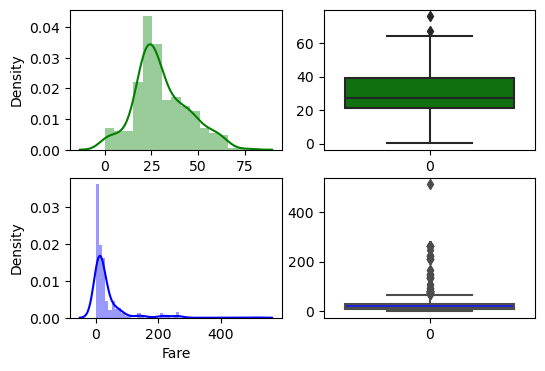

In [12]:
# creating a 2X2 matrix plotting with Age and Fare atribute
plt.figure(figsize=(6,4))

plt.subplot(2,2,1)
sns.distplot(titan['Age'],color='Green')
plt.subplot(2,2,2)
sns.boxplot(titan['Age'],color='Green')

plt.subplot(2,2,3)
sns.distplot(titan['Fare'],color='Blue')
plt.subplot(2,2,4)
sns.boxplot(titan['Fare'],color='Blue')

plt.show()

Most people who booked the tickets were aged between 20-30 and the fare of most tickets was 1-50

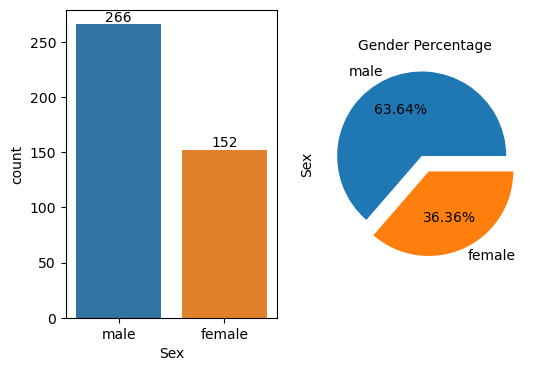

In [13]:
plt.figure(figsize=(6,4))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titan)
ax.bar_label(ax.containers[0])

ax =plt.subplot(1,2,2)
ax=titan['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%');
ax.set_title(label = "Gender Percentage", fontsize = 10);

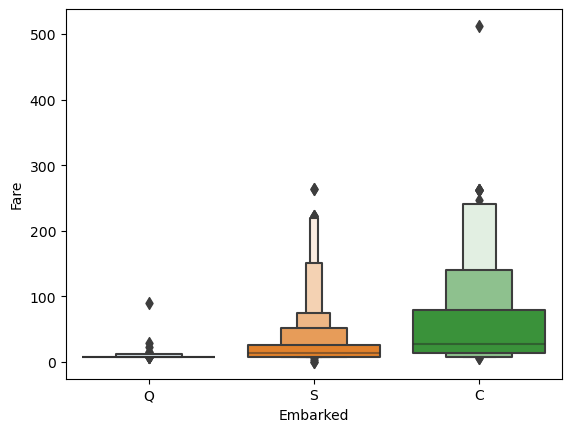

In [14]:
sns.boxenplot(y='Fare', x='Embarked', data=titan)
plt.show()

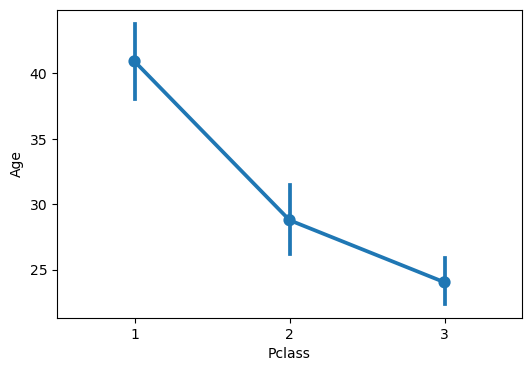

In [15]:
f, ax=plt.subplots(figsize=(6,4))
sns.pointplot(x='Pclass', y='Age', data=titan)
plt.show()

### Lower class passengers were mostly young people

<Axes: xlabel='Embarked', ylabel='count'>

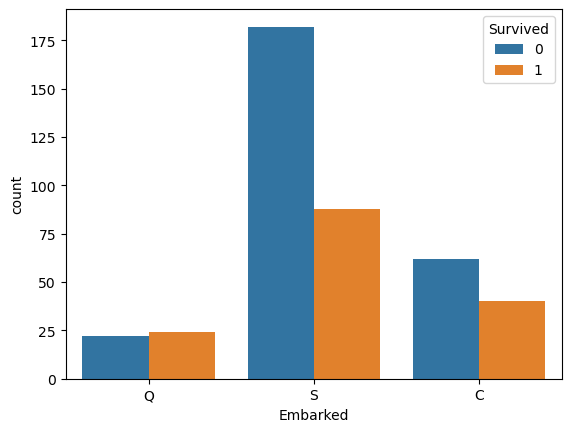

In [16]:
sns.countplot(data=titan, x='Embarked', hue='Survived')

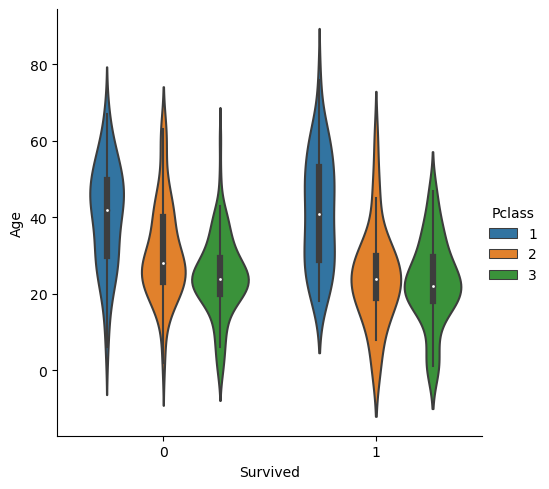

In [17]:
sns.catplot(data=titan,x='Survived',y='Age',hue='Pclass',kind='violin')

<Axes: >

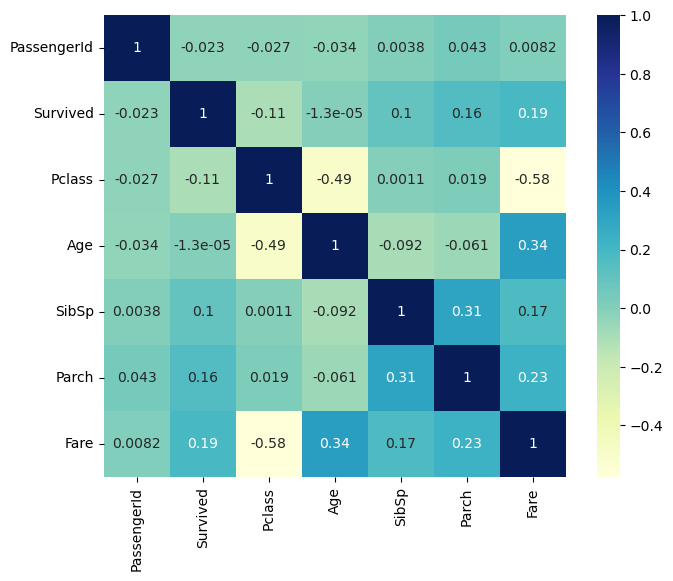

In [18]:
corr=titan.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='YlGnBu',linecolor="black",square=True,annot=True)

In [19]:
# correlation heatmap of highly correlated features with ticket price
high_corr=titan.corr()
high_corr_features=high_corr.index[abs(high_corr['Fare'])>=0.25]
high_corr_features

Index(['Pclass', 'Age', 'Fare'], dtype='object')

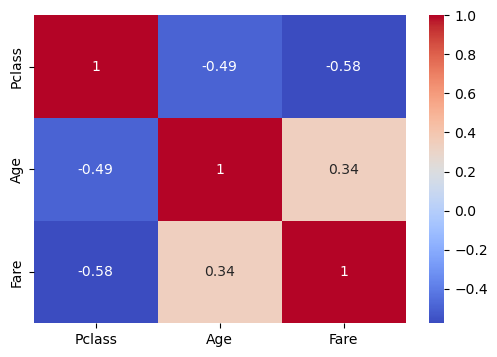

In [20]:
plt.figure(figsize=(6,4))
ax=sns.heatmap(titan[high_corr_features].corr(), cmap='coolwarm', annot=True)

<Axes: xlabel='Age', ylabel='Density'>

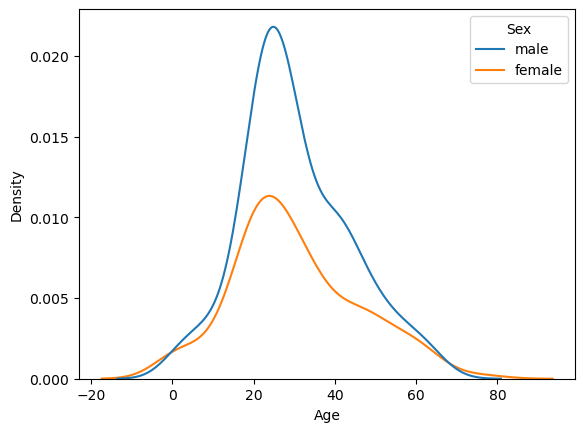

In [21]:
#what average of ages in each categorey
sns.kdeplot(data = titan , x ="Age" , hue ="Sex" )

<Axes: xlabel='Age', ylabel='Fare'>

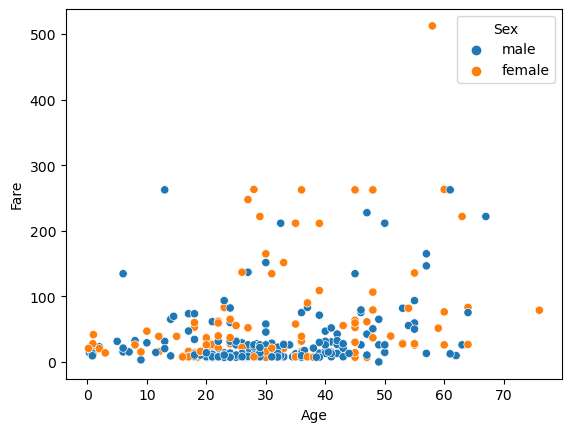

In [22]:
sns.scatterplot(data=titan, x="Age", y="Fare", hue="Sex")

### Preprocessing data

In [23]:
titan=titan.drop(['PassengerId', 'Name', 'Ticket'],axis=1)

In [24]:
titan.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [25]:
# Filled the missing value in Age column with the mean value
titan['Age'] = titan['Age'].fillna(titan['Age'].mean())
# Filled the missing value in Fare columns with mean Value
titan['Fare'] = titan['Fare'].fillna(titan['Fare'].mean())

In [26]:
# converting categorical variable to numerical
import category_encoders as ce
encode=ce.OrdinalEncoder(cols=['Survived','Pclass', 'Sex', 'Embarked'])
titan_encoded=encode.fit_transform(titan)
titan_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


In [28]:
### Splitting Independent and dependent variables

In [29]:
X=titan_encoded.drop(['Survived'],axis=1)
y=titan['Survived']

## Splitting training and testing data

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [31]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00,0,2,83.1583,3
201,1,1,0.33,0,2,14.4000,2
336,2,1,32.00,0,0,13.0000,2
187,1,1,17.00,2,0,8.0500,2
214,1,2,38.00,4,2,7.7750,2


In [32]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

## Model Implementation

In [33]:
titan_encoded.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Logistic Regression

In [34]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[76  0]
 [ 0 50]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_lr) * 100
print("Logistic Regression Accuracy:  " +str(round(accuracy,2)) + '%')
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_lr)))

Logistic Regression Accuracy:  100.0%
MAE: 0.0
MSE: 0.0
RMSE: 0.0


## K nearest neighbour (n=9)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training set score: 0.72
Test set score: 0.65
Accuracy Score: 0.65
Confusion Matrix: 
 [[67  9]
 [35 15]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        76
           1       0.62      0.30      0.41        50

    accuracy                           0.65       126
   macro avg       0.64      0.59      0.58       126
weighted avg       0.64      0.65      0.61       126



## Support Vector Classifier (kernel=linear)

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

print("Training set score: {:.2f}".format(svc_linear.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svc_linear.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_svc_linear)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc_linear))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_linear))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## XGBoost (n-estimators=500)

In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print("Training set score: {:.2f}".format(xgb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(xgb.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_xgb)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

